In [1]:
using Plots, PlotThemes, LaTeXStrings
using OffsetArrays
using LinearAlgebra
using FFTW
using StatsBase
using Unitful
using Base: Fix1, Fix2
using Distributions

pyplot()

theme(:mute)
default(;palette=:seaborn_deep6, fontfamily="serif")
j=im
imsize = (800,300)
imsizesq = (600,300)

(600, 300)

In [2]:
S = OffsetArray(sqrt(13/6).*[0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 0,
0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0,0], -26:26)

L = OffsetArray([1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 0,
1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0] .|> Complex, -26:26) 


shift(x) = [i in 1:26 ? x[i] : (i in 38:63 ? x[i-64] : 0.0+im*0.0) for i in 0:63]

function shift(x, ifft_points)
    x_shift = vcat(x[0:26], zeros(ifft_points-53), x[-26:-1])
    return x_shift
end

function make_preamble(sym) 
    sym2 = sym[length(sym)-Int(length(sym)/2)+1:end]
    return vcat(sym2, sym, sym)
end

function freq_to_wave(x, ifft_points)
    return shift(x, ifft_points) |> ifft |> make_preamble
end

freq_to_wave (generic function with 1 method)

In [3]:
norm(S)

7.211102550927979

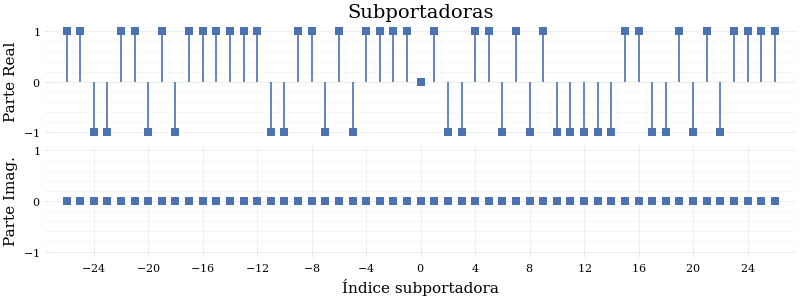

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [4]:
scs = [0,-4,-8,-12,-16,-20,-24,4,8,12,16,20,24]
p1 = plot(real.(L), line=:stem, marker=:square, xticks=[], yticks=[-1,0,1], ylims=[-1.1,1.1], title="Subportadoras", ylabel="Parte Real")
p2 = plot(imag.(L), line=:stem, marker=:square, xticks=scs, yticks=[-1,0,1], ylims=[-1.1,1.1], xlabel="Índice subportadora", ylabel="Parte Imag.")

P_Lf = plot(p1,p2,layout=(2,1), legend=false, size=(800,300))

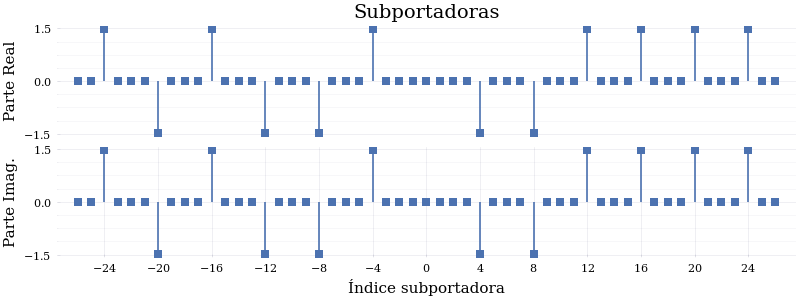

In [5]:
scs = [0,-4,-8,-12,-16,-20,-24,4,8,12,16,20,24]
p1 = plot(real.(S), line=:stem, marker=:square, xticks=[], yticks=[-1.5,0,1.5], title="Subportadoras", ylabel="Parte Real")
p2 = plot(imag.(S), line=:stem, marker=:square, xticks=scs, yticks=[-1.5,0,1.5], xlabel="Índice subportadora", ylabel="Parte Imag.")

P_Sf = plot(p1,p2,layout=(2,1), legend=false, size=(800,300))

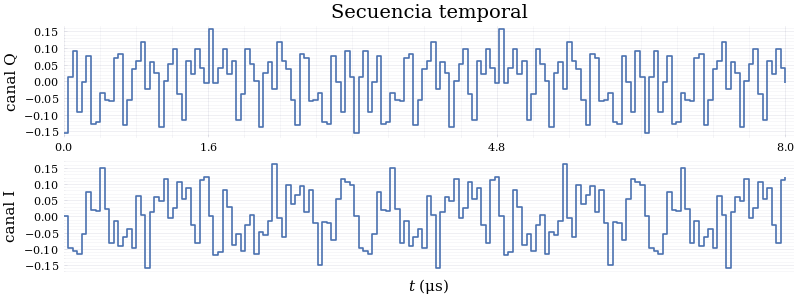

In [6]:
N = 64
sym = freq_to_wave(L, N)
t = range(0u"μs", 8u"μs", length=length(sym))
tiks = [0,1.6,4.8,8...]
p2 = plot(t, imag(sym), line=:steppost, xlims=[0,8.1],ylabel="canal I", xticks=[], xlabel=L"t", title="")
p1 = plot(t, real(sym), line=:steppost, xlims=[0,8.1],ylabel="canal Q", xticks=tiks, xlabel="", title="Secuencia temporal")

P_Lt = plot(p1, p2, layout=(2,1), legend = false, size=(800,300))

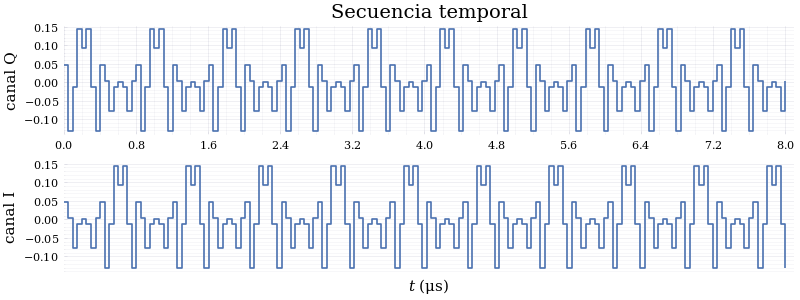

In [7]:
N = 64
sym = freq_to_wave(S, N)
t = range(0u"μs", 8u"μs", length=length(sym))
tiks = [0:0.8:8...]
p2 = plot(t, imag(sym), line=:steppost, xlims=[0,8.1],ylabel="canal I", xticks=[], xlabel=L"t", title="")
p1 = plot(t, real(sym), line=:steppost, xlims=[0,8.1],ylabel="canal Q", xticks=tiks, xlabel="", title="Secuencia temporal")

P_St = plot(p1, p2, layout=(2,1), legend = false, size=(800,300))

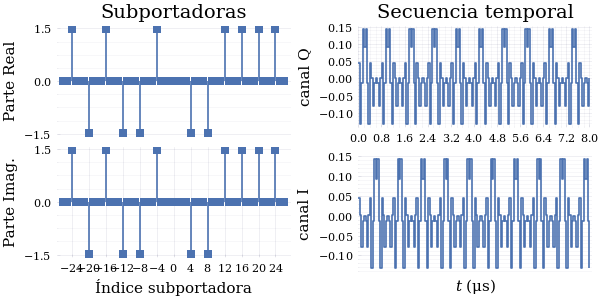

In [8]:
plot(P_Sf, P_St, layout=(1,2), legend = false, size=(600,300))

In [9]:
savefig("Defensa/Images/short.pdf")

"/home/inox/Documents/IB/Tésis/Defensa/Images/short.pdf"

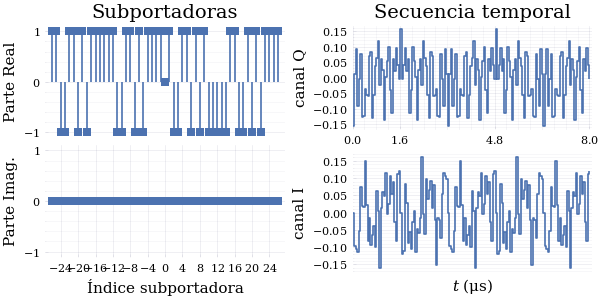

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [10]:
plot(P_Lf, P_Lt, layout=(1,2), legend = false, size=(600,300))

In [11]:
savefig("Defensa/Images/long.pdf")

"/home/inox/Documents/IB/Tésis/Defensa/Images/long.pdf"

In [12]:
length(sym)

160

166500.00000000003
83250.00000000001
18500.000000000004
-83250.00000000001:20812.500000000004:83250.00000000001


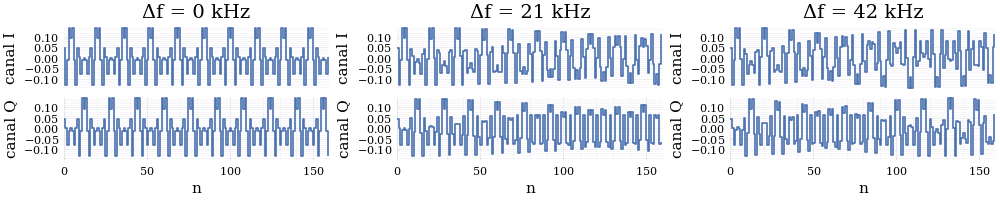

In [37]:
Ts = 8/length(sym)*1e-6
Nf = 9
ref = sym
Δf = (0.0037.*Nf/2)/Ts/2
println(Δf)
println(Δf/2)
println(Δf/Nf)

fs = range(-Δf/2, Δf/2, length=Nf)
println(fs)

ns = 0:length(sym)-1

refs = hcat([exp.(2π*j*Ts*f.*ns).*ref for f in fs]...)

ylabel1 = "canal I"
ylabel2 = "canal Q"

n1 = 5
p11 = plot(ns, real(refs[:,n1]), line=:steppost, xlims=(0,160),ylims=(-0.15,0.15), ylabel=ylabel1, xticks=[], title = "Δf = $(Int(round(fs[n1]*1e-3))) kHz")
p12 = plot(ns, imag(refs[:,n1]), line=:steppost, xlims=(0,160),ylims=(-0.15,0.15), ylabel=ylabel2, xlabel="n")
p1 = plot(p11, p12, layout=(2,1))
n1 = 6
p21 = plot(ns, real(refs[:,n1]), line=:steppost, xlims=(0,160),ylims=(-0.15,0.15), ylabel=ylabel1, xticks=[], title = "Δf = $(Int(round(fs[n1]*1e-3))) kHz")
p22 = plot(ns, imag(refs[:,n1]), line=:steppost, xlims=(0,160),ylims=(-0.15,0.15), ylabel=ylabel2, xlabel="n")
p2 = plot(p21, p22, layout=(2,1))
n1 = 7
p31 = plot(ns, real(refs[:,n1]), line=:steppost, xlims=(0,160),ylims=(-0.15,0.15), ylabel=ylabel1, xticks=[], title = "Δf = $(Int(round(fs[n1]*1e-3))) kHz")
p32 = plot(ns, imag(refs[:,n1]), line=:steppost, xlims=(0,160),ylims=(-0.15,0.15), ylabel=ylabel2, xlabel="n")
p3 = plot(p31, p32, layout=(2,1))
plot(p1, p2, p3, layout=(1,3), legend = :false, size=(1000,200))

In [38]:
savefig("Defensa/Images/references.pdf")

"/home/inox/Documents/IB/Tésis/Defensa/Images/references.pdf"

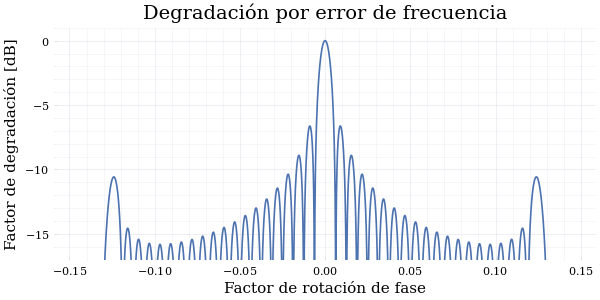

In [16]:
function short_correlate1(w, ref)
    return w'*ref
end

N = 64
sym = freq_to_wave(S, N)

function degradation(fac, sym)
    ns = 0:length(sym)-1
    sym2 = sym.*exp.(2π*j*fac.*ns)
    x = short_correlate1(sym,sym2)./norm(sym)^2
    return x
end

xs = -0.15:0.0001:0.15

degs = [degradation(x, sym) for x in xs]


plot(xs,  10 .* log10.(abs.(degs)), ylims=(-17,1), xlabel="Factor de rotación de fase", title = "Degradación por error de frecuencia", ylabel="Factor de degradación [dB]", legend=false, size=imsizesq)

In [17]:
savefig("Tésis/ibtesis/figs/degradacion-err-freq.pdf")

"/home/inox/Documents/IB/Tésis/Tésis/ibtesis/figs/degradacion-err-freq.pdf"

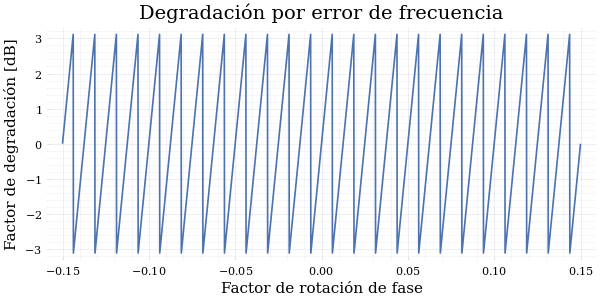

In [18]:
function delay_and_correlate(w)
    L = length(w)/2 |> Int
    return w[1:L]'*w[L+1:end]
end

N = 64
sym = freq_to_wave(S, N)

function dac_phase(fac, sym)
    ns = 0:length(sym)-1
    sym2 = sym.*exp.(2π*j*fac.*ns)
    x = delay_and_correlate(sym2)
    return angle(x)
end

xs = -0.15:0.0001:0.15

phases = [dac_phase(x, sym) for x in xs]


plot(xs,  phases, xlabel="Factor de rotación de fase", title = "Degradación por error de frecuencia", ylabel="Factor de degradación [dB]", legend=false, size=imsizesq)

In [19]:
function target_factor(target)
    return xs[findlast(x-> x >= - target, 10 .* log10.(abs.(degs)))]
end

target_factor (generic function with 1 method)

In [20]:
target_factor(1)

0.0022

In [22]:
length(xs)

3001

In [23]:
function short_correlate(y, idx, ref, Ts, Δf, Nf)
    x1 = y[idx-length(ref)-1:idx]
    ns = 0:length(ref)-1
    fs = range(-Δf/2, Δf/2, length=Nf)
    refs = hcat([exp.(2π*j*Ts*f.*ns).*ref for f in fs]...)
    return hcat([x1'*r for r in eachcol(refs)]...)
end

short_correlate (generic function with 1 method)

In [24]:
function short_correlate(y, idx, ref, Ts, Δf, Nf)
    x1 = y[idx-length(ref)+1:idx]
    ns = 0:length(ref)-1
    fs = range(-Δf/2, Δf/2, length=Nf)
    refs = hcat([exp.(2π*j*Ts*f.*ns).*ref for f in fs]...)
    return hcat([x1'*r for r in eachcol(refs)]...)
end

short_correlate (generic function with 1 method)

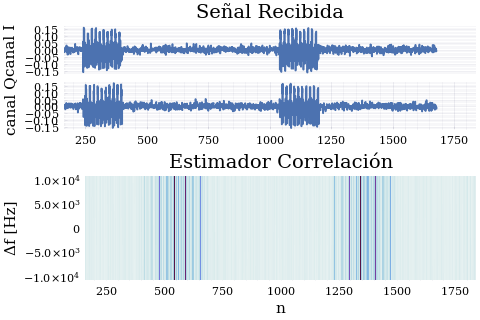

In [25]:
N = 2000
start_t1 = 400
start_t2 = 1200
Δf = 20e3
Nf = 15
fs = range(-Δf/2, Δf/2, length=Nf)

σ=0.015
d = Normal(0,σ)

y = rand(d, N) .+ j.*rand(d, N)
f_err = -0.2e3
sym_ferr = sym.*exp.(im*2*pi*f_err*Ts.* (1:length(sym)))
y[start_t1+1:start_t1+length(sym)] .+= sym_ferr
f_err = 0.15e3
sym_ferr = sym.*exp.(im*2*pi*f_err*Ts.* (1:length(sym)))
y[start_t2+1:start_t2+length(sym)] .+= sym_ferr


idxs = length(sym)+2:N-length(sym)
est1 = vcat([short_correlate(y, idx, ref, Ts, Δf, Nf) for idx in idxs]...)

p11 = plot(real(y[idxs]), xticks=false, line=:steppost, xlims=extrema(idxs), ylabel="canal I", xlabel="", title="Señal Recibida")
p12 = plot(imag(y[idxs]), line=:steppost, xlims=extrema(idxs), ylabel="canal Q", xlabel="", title="")
p1 = plot(p11,p12, layout=(2,1))
p3 = heatmap(idxs, fs, abs.(est1)', xlims=extrema(idxs), ylabel="Δf [Hz]", xlabel="n", c=:dense, colorbar=false, title="Estimador Correlación")

plot(p1, p3, layout=(2,1), legend = false, size=(600,400).*0.8)

In [26]:
savefig("Avance 2/Images/banco-xcorr.svg")

"/home/inox/Documents/IB/Tésis/Avance 2/Images/banco-xcorr.svg"

In [27]:
function threshold(PFA, σ2, ref)
    return sqrt(-2*norm(ref)^2*σ2*log(PFA))
end


function estimate_noise(y, idx, N)
    y1 = y[idx:idx+N-1]
    y_m = mean(y1)
    return (norm(y1.-y_m))^2/(2*(N-1))
end


estimate_noise (generic function with 1 method)

In [28]:
N = 4000
start_t1 = 700
start_t2 = 2200

σ=0.1
d = Normal(0,σ)

y = rand(d, N) .+ j.*rand(d, N)
f_err = -0.2e3
sym_ferr = sym.*exp.(im*2*pi*f_err*Ts.* (1:length(sym)))
y[start_t1+1:start_t1+length(sym)] .+= sym_ferr
f_err = 0.15e3
sym_ferr = sym.*exp.(im*2*pi*f_err*Ts.* (1:length(sym)))
y[start_t2+1:start_t2+length(sym)] .+= sym_ferr

L = length(sym)
idxs = 1:N-L
est1 = vcat([short_correlate(y, idx, ref, Ts, Δf, Nf) for idx in idxs]...)

PFA = 10e-6
est_var = [estimate_noise(y, i, L) for i in idxs]
Ths = [threshold(PFA, v, sym) for v in est_var]

true_var = idxs.*0 .+ σ^2

detect(est, Ts) = abs(est) > Ts
row_detect(est_row, T) = [detect(est, T) ? est : 0 for est in est_row]
detections = hcat([row_detect(est_row, T) for (est_row, T) in zip(eachrow(abs.(est1)), Ths)]...)

p1 = plot(real(y[idxs]), xticks=false, line=:steppost, ylabel="canal I", xlabel="", title="Correlación Short Training Sequence")
p2 = plot(est_var, line=:steppost, ylabel="Var.", xlabel="", xticks=[], label="MVU")
plot!(p2, true_var, label="σ²", ylims=(0, maximum(est_var)*1.2))
p3 = heatmap(idxs, fs, abs.(est1)', line=:steppost, ylabel="Δf", xlabel="n", xticks=[])
p4 = heatmap(idxs, fs, detections, line=:steppost, ylabel="Δf", xlabel="n", xticks=[])

plot(p1, p2, p3, p4, layout=(4,1), legend = false)

BoundsError: BoundsError: attempt to access 4000-element Vector{ComplexF64} at index [-158:1]

In [29]:
p = repeat([plot()], length(fs))

ylims = extrema(detections)
@info ylims

for i in 1:length(fs)
    p[i] = plot(idxs, detections[i,:], line=:steppost, xticks=[], ylims=ylims, label="Δf = $(round(fs[i])) Hz")
end

plot(p..., layout=(length(fs),1))

UndefVarError: UndefVarError: `detections` not defined